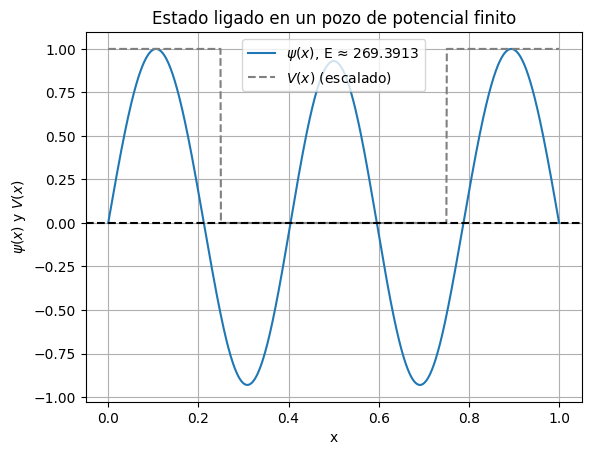

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def numerov_step(psi_prev, psi_curr, k_prev, k_curr, k_next, dx):
    """
    Un paso del método de Numerov para resolver ecuaciones diferenciales.
    """
    factor = (2 * (1 - (5/12) * dx**2 * k_curr) * psi_curr -
              (1 + (1/12) * dx**2 * k_prev) * psi_prev) / (1 + (1/12) * dx**2 * k_next)
    return factor

def potential_finite_well(x, L, a, V0):
    """
    Define un pozo de potencial finito centrado en L/2, de ancho a y profundidad V0.
    """
    center = L / 2
    return np.where(np.abs(x - center) <= a / 2, 0, V0)

def solve_numerov_finite_well(E, V0=50, a=0.5, L=1.0, N=1000):
    """
    Resuelve la ecuación de Schrödinger con método de Numerov para un pozo de potencial finito.
    """
    dx = L / N
    x = np.linspace(0, L, N+1)

    # Definir el potencial
    V = potential_finite_well(x, L, a, V0)

    # En unidades naturales: hbar^2 / 2m = 1 => k^2 = E - V(x)
    k2 = E - V

    # Condiciones iniciales
    psi = np.zeros_like(x)
    psi[1] = 1e-5  # pequeño valor inicial

    for i in range(1, N):
        psi[i+1] = numerov_step(psi[i-1], psi[i], k2[i-1], k2[i], k2[i+1], dx)

    return x, psi, V

def find_energy_bisection(E1, E2, V0=50, a=0.5, L=1.0, tol=1e-5):
    """
    Encuentra un valor propio de energía usando el método de bisección.
    """
    while abs(E2 - E1) > tol:
        E_mid = (E1 + E2) / 2
        _, psi_mid, _ = solve_numerov_finite_well(E_mid, V0=V0, a=a, L=L)

        if psi_mid[-1] * solve_numerov_finite_well(E1, V0=V0, a=a, L=L)[1][-1] < 0:
            E2 = E_mid
        else:
            E1 = E_mid

    return (E1 + E2) / 2

# Parámetros del pozo
L = 1.0     # longitud total del dominio
a = 0.5     # ancho del pozo
V0 = 50     # altura del potencial fuera del pozo

# Buscar energía propia (estado fundamental)
E_guess = find_energy_bisection(10, V0 - 25, V0=V0, a=a, L=L)
x, psi, V = solve_numerov_finite_well(E_guess, V0=V0, a=a, L=L)

# Normalizar psi para graficar
psi /= np.max(np.abs(psi))

# Graficar potencial y función de onda
plt.plot(x, psi, label=f'$\\psi(x)$, E ≈ {E_guess:.4f}')
plt.plot(x, V / np.max(V), '--', color='gray', label='$V(x)$ (escalado)')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('x')
plt.ylabel('$\psi(x)$ y $V(x)$')
plt.title('Estado ligado en un pozo de potencial finito')
plt.legend()
plt.grid(True)
plt.show()
